# Ensembles Tuning and CV


Like R, Python uses packages in data mining/machine learning. The 3 mose common ones are Pandas (manipulation), Scikit Learn (machine learning) and Matplotlit (graphics).

In [66]:
import os
os.chdir('/Users/nathanielbozarth/Desktop/Pred_Models_git/Week 5')


In [67]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
roc_curve, auc, confusion_matrix, classification_report

#models
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#other utilities
import scipy.stats as ss
import time
from operator import itemgetter
import os
os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [68]:
#cd '..'

# Read in Data
# Churn Calls Data
This is a Pandas operation.

In [69]:
#import data
df = pd.read_csv("data/Churn_Calls.csv", sep=',')
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


In [70]:
# See each collum name
print(df.columns)

Index(['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn'], dtype='object')


In [71]:
df.shape

(5000, 20)

# EDA
Just a touch of EDA. This is the distribution of the target. As you can see, the datset is imbalanced and the target class of interest "yes" is in the minority (a common occurance in classification).

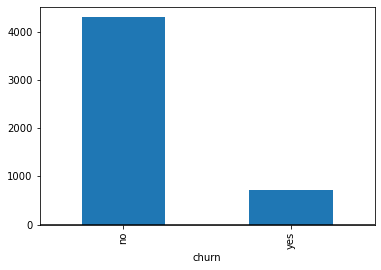

In [72]:
gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# Preprocessing
The below two steps are for preprocessing. The first cell changes the yes/no of the target to numeric. I needed to do this as some models require the target to be numeric. The second cell takes all the category features and creates dummies with them. This is stock code I have used for long time (and I did not write it). It is nice because it will take any dataframe of any size and handle categorial features. I do not have to change a single line in it. It can be used generically on bascially any dataframe. Saves a lot of time of coding each feature.

In [73]:
encoder = preprocessing.LabelEncoder()
#to convert into numbers
y = encoder.fit_transform(df['churn'])

X = df.loc[:, df.columns != 'churn']



In [74]:
X = pd.get_dummies(X, drop_first=True)
X = preprocessing.StandardScaler().fit_transform(X)


# Test/Train
I split the data into a 60/40 train test. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". I used a biggest test when I have an imbalanced set. 

In [75]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size=0.40, random_state=0)

Just a view of the size of each test/train set.
Note there are now 73 features, and the test set is imbalanced (14.6%)

In [76]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())
#data.groupby(['col1', 'col2'])

(2000, 69)
(3000, 69)
(2000,)
(3000,)
Percent of Target that is Yes 0.146


# Models
All the models are done in Sci-Kit Learn.

## Decision Tree
I created a decision tree from the data. The accurancy of the model was 921%, while the test data classified at 92%. However notice that the "yes" class (the class I am interested in) only properly classified at 74% (specificity) and .71 (recall). That is so-so. Again, not uncommon with imbalanced data. 

In [77]:
#Decision Tree train model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))

DT Accuracy Score 0.929
              precision    recall  f1-score   support

   Fail = no       0.96      0.96      0.96      1708
  Fail = yes       0.77      0.74      0.75       292

    accuracy                           0.93      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.93      0.93      0.93      2000



### Cross Validation of Decision Tree
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .92, which is quite close to the orginal model. I am not going to worry about over fitting.

In [78]:
#verify DT with Cross Validation
scores = cross_val_score(clf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.93       0.9        0.92333333 0.93       0.92       0.92333333
 0.92666667 0.92333333 0.93       0.91      ]


0.9216666666666666

### Visual of Confusion Matrix for Decision Tree

[[1643   65]
 [  77  215]]


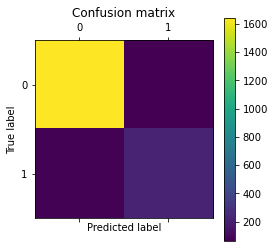

In [79]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_dt)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

## Random Forest
Using the same data, I built a random forest with 500 bootstrapped trees. Notice I parallelized this to 4 cores as big random forest can be computationally expensive. 

My overall results went up by 3% over the decision tree. Also, my minory target precision, but the recall decresed.  

In [80]:
# train random forest model
#paralleized to 4 cores 
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print(accuracy_score(target_test, target_predicted_rf))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_rf))


0.949
              precision    recall  f1-score   support

  Churn = no       0.95      1.00      0.97      1708
 Churn = yes       0.97      0.67      0.79       292

    accuracy                           0.95      2000
   macro avg       0.96      0.83      0.88      2000
weighted avg       0.95      0.95      0.94      2000

[[1703    5]
 [  97  195]]


### Cross Validation of Random Forest
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .949, which is quite close to the orginal model. I am not going to worry about over fitting.

In [81]:
#verify RF with cross validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.94333333 0.94333333 0.95       0.96333333 0.93666667 0.93666667
 0.94666667 0.94       0.93666667 0.94666667]


0.9443333333333334

### Viz of Confusion Matrix for Random Forest

[[1703    5]
 [  97  195]]


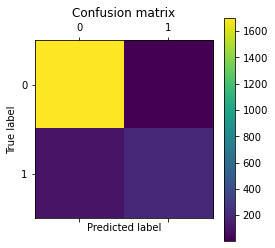

In [82]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_rf)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

# Model Tuning
You can tune any argument in these models. I did a grid search only on max_features (mtry in R). I parallelized the job to 4 cores for speed. You can see that max_features (mtry) of 5 had the best results. But frankly was very little difference from the other parameter results.

In [84]:
# use a full grid over all parameters
param_grid = {"max_features": [2, 3, 4, 5]}
start_time = time.time()




# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train, target_train)

print(time.time() - start_time, "seconds")
print(grid_search.cv_results_)
print("best parameters: ", grid_search.best_params_)


23.736698865890503 seconds
{'mean_fit_time': array([3.7853435 , 3.89138598, 4.268049  , 4.17113338]), 'std_fit_time': array([0.08214272, 0.0705539 , 0.20993345, 0.51194381]), 'mean_score_time': array([0.21855254, 0.19070296, 0.1971014 , 0.16595869]), 'std_score_time': array([0.02896802, 0.01852814, 0.03846632, 0.03160324]), 'param_max_features': masked_array(data=[2, 3, 4, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 3}, {'max_features': 4}, {'max_features': 5}], 'split0_test_score': array([0.88      , 0.89166667, 0.89333333, 0.90333333]), 'split1_test_score': array([0.88833333, 0.90666667, 0.92666667, 0.93333333]), 'split2_test_score': array([0.89166667, 0.9       , 0.90666667, 0.91      ]), 'split3_test_score': array([0.89      , 0.9       , 0.91333333, 0.92833333]), 'split4_test_score': array([0.895     , 0.90333333, 0.915     , 0.92833333]), 'mean_test_score': array([0.889     

## More Details
Now that we know our random forest was the best model of the three I ran, I will gather some other information. Below is a non-ordered list of feature importance. I only showed 20 for purposes of space.

In [85]:
#Show importance of each feature in Random Forest
features = zip(df.columns[1:20], rf.feature_importances_)
print(list(features)) #there's got to be a prettier way to print this

[('account_length', 0.0338661750905449), ('area_code', 0.024687100886356537), ('international_plan', 0.1267744336876273), ('voice_mail_plan', 0.03117366847948784), ('number_vmail_messages', 0.1296920606928562), ('total_day_minutes', 0.05737402191860757), ('total_day_calls', 0.03069849584313415), ('total_day_charge', 0.055828338767993854), ('total_eve_minutes', 0.03985069460163565), ('total_eve_calls', 0.030811491046100235), ('total_eve_charge', 0.03758300445529976), ('total_night_minutes', 0.04186787569798808), ('total_night_calls', 0.04106563690061216), ('total_night_charge', 0.039240372373089354), ('total_intl_minutes', 0.10242369576931991), ('total_intl_calls', 0.000810435086885952), ('total_intl_charge', 0.0019349074945556742), ('number_customer_service_calls', 0.0019135326997010453), ('churn', 0.0029406038120602745)]


## ROC curve for Random Forest
Finally a ROC curve that shows the lift I get from the Random Forest model. 

ROC AUC: 0.923


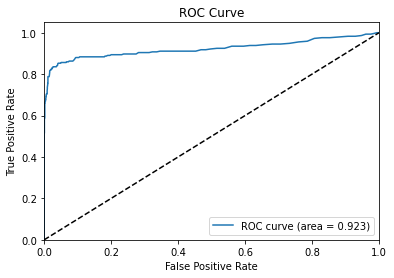

In [86]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest does the best, but I still am not getting the accurancy on my target class of interest. I have a few tricks I can do to work on this, but that is for another day/class.

In [88]:
nn = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
nn.fit(features_train, target_train)

y_valid = nn.predict(features_test)

score = nn.score(features_test, target_test)
print(score)

0.8875


/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [89]:
clf_NN1 =MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf_NN1.fit(features_train, target_train)
# test random forest model
target_predicted_NN1 = clf_NN1.predict(features_test)
print("Accuracy", accuracy_score(target_test, target_predicted_NN1))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_NN1, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_NN1))

Accuracy 0.865
              precision    recall  f1-score   support

  Churn = no       0.93      0.92      0.92      1708
 Churn = yes       0.54      0.57      0.55       292

    accuracy                           0.86      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.87      0.86      0.87      2000

[[1563  145]
 [ 125  167]]
